Скачайте датасет и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [179]:
df = pd.read_csv(r'C:\GB\DataEngineer\Data_collection\HW\8\osteoporosis.csv')

Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

Видим, что пустые значения есть в столбцах Alcohol Consumption, Medical Conditions, Medications. Ну так же видим, что все ненулевые значения имеют положительный результат: например Alcohol Consumption имеет кроме None только значение Moderate, отсюда можно предположить, что None соответствуют нулевому значению потребления алкоголя, не могут же быть все участники исследования только потребляющими алкоголь. Соответвенно заменим все значения None в этих трех категориях на 'нет', заодно выполним проектирование этих признаков путем реализации label encoding (заодно преобразуем все остальные булевые колонки). 

In [181]:
df.head(8).T

,0,1,2,3,4,5,6,7
Id,1734616,1419098,1797916,1805337,1351334,1799320,1577644,1443912
Age,69,32,89,78,38,41,20,39
Gender,Female,Female,Female,Female,Male,Male,Male,Male
Hormonal Changes,Normal,Normal,Postmenopausal,Normal,Postmenopausal,Normal,Postmenopausal,Postmenopausal
Family History,Yes,Yes,No,No,Yes,Yes,Yes,Yes
Race/Ethnicity,Asian,Asian,Caucasian,Caucasian,African American,Caucasian,African American,Asian
Body Weight,Underweight,Underweight,Normal,Underweight,Normal,Normal,Underweight,Normal
Calcium Intake,Low,Low,Adequate,Adequate,Low,Low,Adequate,Adequate
Vitamin D Intake,Sufficient,Sufficient,Sufficient,Insufficient,Sufficient,Sufficient,Sufficient,Sufficient
Physical Activity,Sedentary,Sedentary,Active,Sedentary,Active,Active,Sedentary,Sedentary


In [184]:
cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake','Physical Activity','Smoking','Alcohol Consumption','Medical Conditions', 'Medications', 'Prior Fractures']
le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({0:1, 1:0})
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Id,1734616,1419098,1797916,1805337,1351334,1799320,1577644,1443912,1379331,1824991
Age,69,32,89,78,38,41,20,39,70,19
Gender,0,0,0,0,1,1,1,1,1,0
Hormonal Changes,0,0,1,0,1,0,1,1,1,0
Family History,1,1,0,0,1,1,1,1,0,0
Race/Ethnicity,1,1,2,2,0,2,0,1,1,0
Body Weight,1,1,0,1,0,0,1,0,1,0
Calcium Intake,1,1,0,0,1,1,0,0,1,1
Vitamin D Intake,1,1,1,0,1,1,1,1,1,1
Physical Activity,1,1,0,1,0,0,1,1,0,0


In [185]:
# удаление дубликатов
df.drop_duplicates(inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Id                   1958 non-null   int64
 1   Age                  1958 non-null   int64
 2   Gender               1958 non-null   int64
 3   Hormonal Changes     1958 non-null   int64
 4   Family History       1958 non-null   int64
 5   Race/Ethnicity       1958 non-null   int64
 6   Body Weight          1958 non-null   int64
 7   Calcium Intake       1958 non-null   int32
 8   Vitamin D Intake     1958 non-null   int32
 9   Physical Activity    1958 non-null   int32
 10  Smoking              1958 non-null   int32
 11  Alcohol Consumption  1958 non-null   int32
 12  Medical Conditions   1958 non-null   int32
 13  Medications          1958 non-null   int32
 14  Prior Fractures      1958 non-null   int32
 15  Osteoporosis         1958 non-null   int64
dtypes: int32(8), int64(8)
me

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете. Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

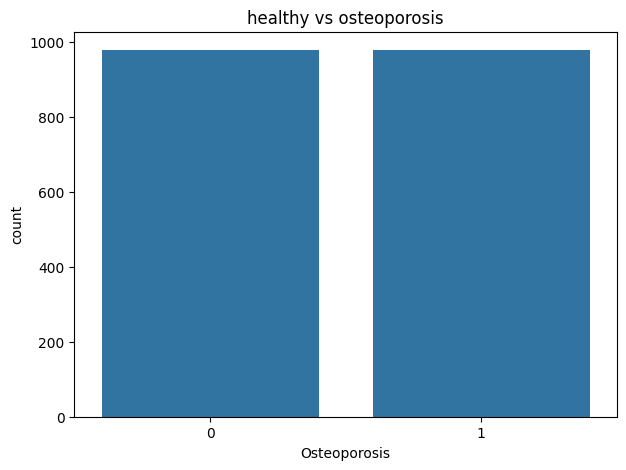

In [187]:
#Сравним количество больных и здоровых людей в датасете, видим что их количество одинаково
plt.figure(figsize=(7, 5))
sns.countplot(x="Osteoporosis", data=df)
plt.title("healthy vs osteoporosis")
plt.show()

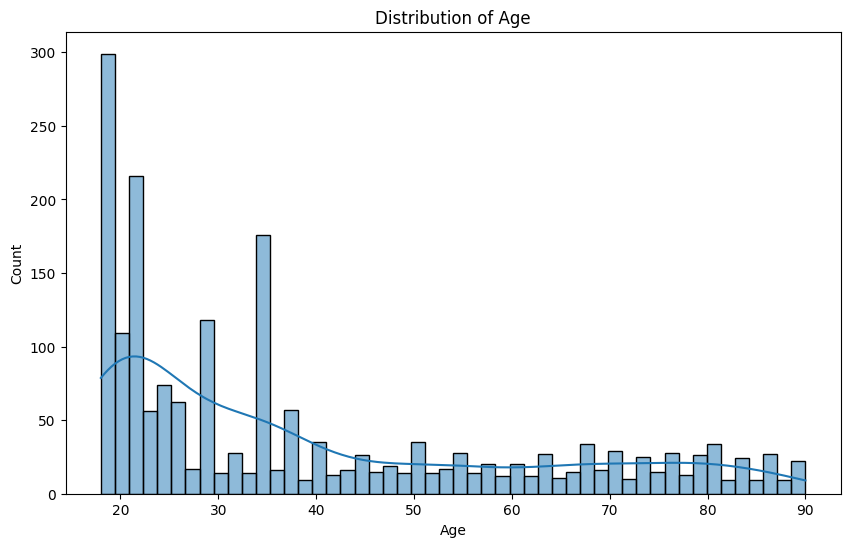

In [188]:
# Посмотрим гистограмму распределения возраста людей, учавствующих в исследовании
plt.figure(figsize=(10, 6)) # Задание размера графика
sns.histplot(df['Age'], kde=True, bins=50) # Создание гистограммы с ядерной оценкой плотности
plt.xlabel('Age') # Подпись оси X
plt.title('Distribution of Age') # Название графика
plt.show()

<Axes: >

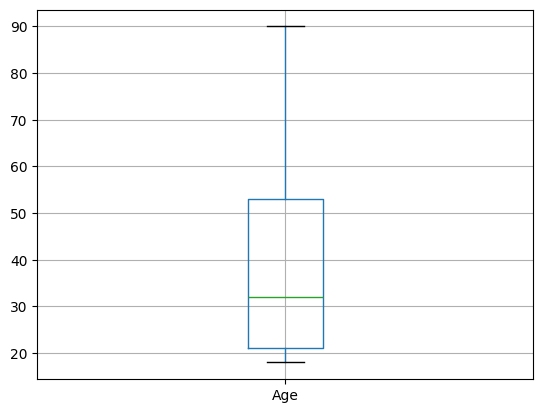

In [189]:
#Построим бокс-плот
df.boxplot(column=['Age'])


In [190]:
# обнаружение и обработка выбросов 
z_scores = np.abs(stats.zscore(df['Age'])) 
df = df[(z_scores <3)] # удалим все значения,выходящие за предел 3 сигма (хотя в этом датасете выбросов нет)

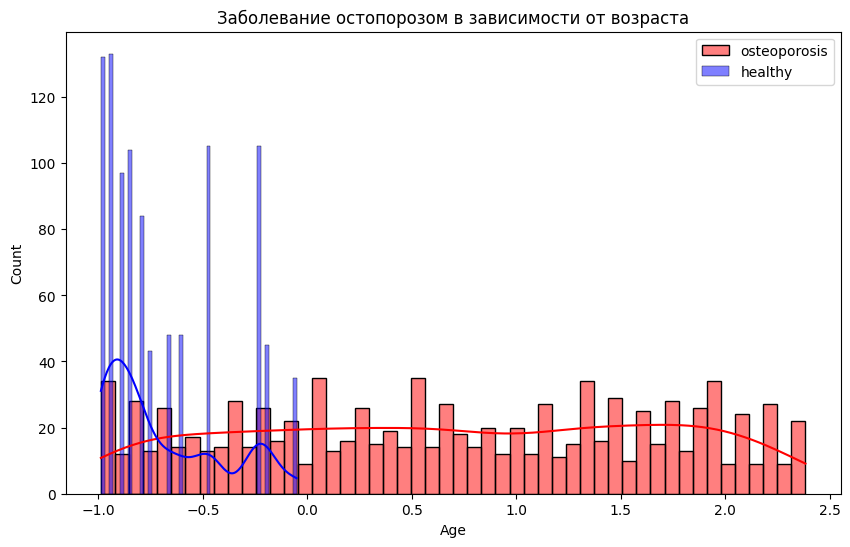

In [191]:
#Разделим данные на два датасета по признаку yes - больные остеопорозом, и no - здоровы, построим гистограмму обоих датасетов
plt.figure(figsize=(10, 6))
df_yes = df_standardized[df['Osteoporosis']==1]
df_no = df_standardized[df['Osteoporosis']==0]
sns.histplot(df_yes['Age'], kde=True, color='red', label='osteoporosis', bins = 50)
sns.histplot(df_no['Age'], kde=True, color='blue', label='healthy', bins = 50)
plt.title('Заболевание остопорозом в зависимости от возраста')
plt.legend()
plt.show()

In [192]:
# стандартизицая данных возраста, отдельно больных и здоровых
#больные
df_yes_standardized = df_yes.copy() # копия датафрейм
df_yes_standardized['Age'] = (df_yes_standardized['Age'] - df_yes_standardized['Age'].mean()) / df_yes_standardized['Age'].std()
#злоровые
df_no_standardized = df_no.copy() # копия датафрейм
df_no_standardized['Age'] = (df_no_standardized['Age'] - df_no_standardized['Age'].mean()) / df_no_standardized['Age'].std()

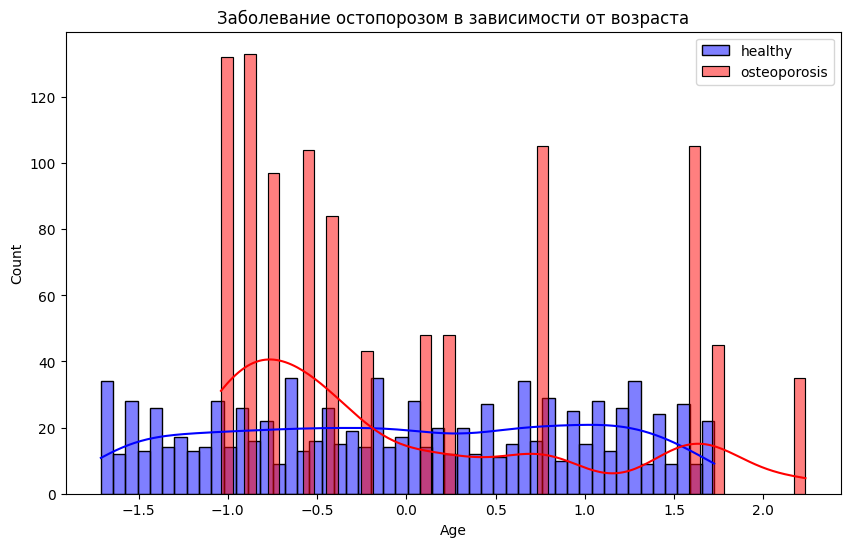

In [193]:
#еще раз изобразим оба наших нормализованных датасета
plt.figure(figsize=(10, 6))
sns.histplot(df_yes_standardized['Age'], kde=True, color='blue', label='healthy',bins=50)
sns.histplot(df_no_standardized['Age'], kde=True,  color='red', label='osteoporosis',bins=50)
plt.title('Заболевание остопорозом в зависимости от возраста')
plt.legend()
plt.show()

In [194]:
#Проверим распределение на нормальность
from scipy.stats import shapiro
shapiro(df_yes_standardized['Age'])

ShapiroResult(statistic=0.9543537357958569, pvalue=6.945320236995751e-17)

In [195]:
shapiro(df_no_standardized['Age'])

ShapiroResult(statistic=0.8508098824017405, pvalue=2.13393624875884e-29)

Так как pvalue в обоих случаях значительно ниже 0,05, делаем вывод о ненормальном распределении выборки возрастов в обоих датасетах.

In [196]:
# создание сводной таблицы зависимости среднего возратса по категориям употребления/или нет алкоголя
pivot_table = df.pivot_table(index="Alcohol Consumption", columns='Osteoporosis', values='Age', aggfunc='mean')
print(pivot_table)

Osteoporosis                 0          1
Alcohol Consumption                      
0                    24.321212  53.748479
1                    24.365702  53.971193


In [197]:
# создание сводной таблицы зависимости среднего возратса по расе
pivot_table = df.pivot_table(index="Race/Ethnicity", columns='Osteoporosis', values='Age', aggfunc='mean')
print(pivot_table)

Osteoporosis            0          1
Race/Ethnicity                      
0               24.121662  56.200581
1               24.454259  51.796178
2               24.464615  53.367601


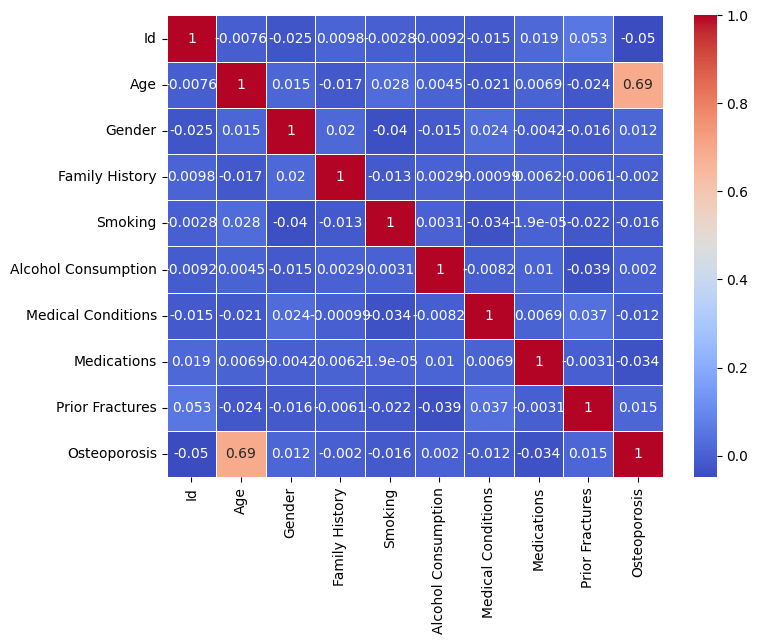

In [198]:
#Посмотрим, если ли корреляция заболевания остеопорозом с каким либо числовым признаком в данных
corr_matrix = df_standardized.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Видим, что корреляция есть только с возрастом человека (коэффициент корреляции 0,69). На самом деле не совсем понятный  датасет, потому что здоровые учтены только до  40 лет, и не понятно по какой причине. И если взрослее все в испытуемой группе заболевали, то корреляция с возратом есть. а если просто изначально набрали такие разные возрасты по группам, то не факт.

In [199]:
#запишем преобразованный датасет в файл
df_standardized.to_csv('out.scv', index=False)